In [40]:
# Import dependencies
import pandas as pd
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
from config import GEOAPIFY_API
import requests
import pprint
import time
import hvplot.pandas
import holoviews as hv
import matplotlib.pyplot as plt



pd.set_option('max_colwidth', 400)

ModuleNotFoundError: No module named 'config'

### Shark Attacks data retrieval

In [4]:
# Read the data into a Pandas DataFrame
shark_data_raw_df = pd.read_excel("GSAF5-1.xls")
shark_data_raw_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2019.08.27,27-Aug-2019,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,6.5' shark,"K. McMurray, TrackingSharks.com",2019.08.27-Walsh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.27,2019.08.27,6452.0,NaN,NaN
1,2019.08.21,21-Aug-2019,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,NaN,"K. McMurray, TrackingSharks.com",2019.08.21-Mariani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.21,2019.08.21,6451.0,NaN,NaN
2,2019.08.20,20-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,NaN,"Hawaii News Now, 8/20/2019",2019.08.20-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.20,2019.08.20,6450.0,NaN,NaN
3,2019.08.16,16-Aug-2019,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,NaN,"WESH, 8/16/2019",2019.08.16-Crum.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.16,2019.08.16,6449.0,NaN,NaN
4,2019.08.11,11-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,10' to 12' shark,"M. Michaelson, GSAF",2019.08.11-Keliikipi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.11,2019.08.11,6448.0,NaN,NaN


In [5]:
# Get a brief summary of the shark_data_raw_df DataFrame
shark_data_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8739 non-null   object 
 1   Date                    6451 non-null   object 
 2   Year                    6449 non-null   float64
 3   Type                    6447 non-null   object 
 4   Country                 6401 non-null   object 
 5   Area                    5988 non-null   object 
 6   Location                5904 non-null   object 
 7   Activity                5901 non-null   object 
 8   Name                    6241 non-null   object 
 9   Sex                     5886 non-null   object 
 10  Age                     3586 non-null   object 
 11  Injury                  6423 non-null   object 
 12  Fatal (Y/N)             5905 non-null   object 
 13  Time                    3064 non-null   object 
 14  Species                 3545 non-null 

In [6]:
# Limit the attacks to those that occurred in the United States or Canada to match Bear Attacks data
shark_data_north_america_df = shark_data_raw_df[shark_data_raw_df["Country"].isin(["USA", "CANADA"])]
shark_data_north_america_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2019.08.27,27-Aug-2019,2019.0,Provoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Donald Walsh,M,...,6.5' shark,"K. McMurray, TrackingSharks.com",2019.08.27-Walsh.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.27,2019.08.27,6452.0,NaN,NaN
1,2019.08.21,21-Aug-2019,2019.0,Unprovoked,USA,Florida,"Fort Lauderdale, Broward County",Wading,Christian Mariani,M,...,NaN,"K. McMurray, TrackingSharks.com",2019.08.21-Mariani.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.21,2019.08.21,6451.0,NaN,NaN
2,2019.08.20,20-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Napoopoo Park in Kealakekua Bay, The Big Island",Swimming,female,F,...,NaN,"Hawaii News Now, 8/20/2019",2019.08.20-Hawaii.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.20,2019.08.20,6450.0,NaN,NaN
3,2019.08.16,16-Aug-2019,2019.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Wading,Maggie Crum,M,...,NaN,"WESH, 8/16/2019",2019.08.16-Crum.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.16,2019.08.16,6449.0,NaN,NaN
4,2019.08.11,11-Aug-2019,2019.0,Unprovoked,USA,Hawaii,"Makaha Beach, Oahu",Surfing,Max Keliikipi,M,...,10' to 12' shark,"M. Michaelson, GSAF",2019.08.11-Keliikipi.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2019.08.11,2019.08.11,6448.0,NaN,NaN


In [5]:
# Get a brief summary of the shark_data_usa_df DataFrame
shark_data_north_america_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2322 entries, 0 to 6446
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             2321 non-null   object 
 1   Date                    2322 non-null   object 
 2   Year                    2322 non-null   float64
 3   Type                    2322 non-null   object 
 4   Country                 2322 non-null   object 
 5   Area                    2316 non-null   object 
 6   Location                2268 non-null   object 
 7   Activity                2185 non-null   object 
 8   Name                    2291 non-null   object 
 9   Sex                     2221 non-null   object 
 10  Age                     1565 non-null   object 
 11  Injury                  2317 non-null   object 
 12  Fatal (Y/N)             2130 non-null   object 
 13  Time                    1452 non-null   object 
 14  Species                 1374 non-null   objec

In [6]:
shark_data_north_america_df.describe()

,Year,original order
count,2322.000000,2322.000000
mean,1966.368648,3824.114126
std,178.481008,1728.334868
min,0.000000,4.000000
25%,1965.000000,2671.500000
50%,1997.000000,4084.500000
75%,2009.000000,5211.750000
max,2019.000000,6452.000000


### Shark Data Cleaning

In [7]:
# Change headers to lowercase and replace spaces with underscores
shark_data_north_america_df.columns = shark_data_north_america_df.columns.str.lower().str.strip().str.replace(" ", "_")
shark_data_north_america_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2322 entries, 0 to 6446
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             2321 non-null   object 
 1   date                    2322 non-null   object 
 2   year                    2322 non-null   float64
 3   type                    2322 non-null   object 
 4   country                 2322 non-null   object 
 5   area                    2316 non-null   object 
 6   location                2268 non-null   object 
 7   activity                2185 non-null   object 
 8   name                    2291 non-null   object 
 9   sex                     2221 non-null   object 
 10  age                     1565 non-null   object 
 11  injury                  2317 non-null   object 
 12  fatal_(y/n)             2130 non-null   object 
 13  time                    1452 non-null   object 
 14  species                 1374 non-null   objec

#### Clean date

In [8]:
# Verify the original values
shark_data_north_america_df.date.unique()

array(['27-Aug-2019', '21-Aug-2019', '20-Aug-2019', ..., 'Before 1921',
       'Before 17-Jul-1916', '1900-1905'], dtype=object)

In [9]:
# Replace 'Reported' with an empty string in the 'Date' column
shark_data_north_america_df['date'] = shark_data_north_america_df['date'].str.replace('Reported ', '', regex=False)

# Convert 'Date' to datetime
shark_data_north_america_df['date'] = pd.to_datetime(shark_data_north_america_df['date'], errors='coerce', format='%d-%b-%Y')

# Optionally, print the distinct values after cleaning
shark_data_north_america_df['date'].unique()

C:\Users\carlo\AppData\Local\Temp\ipykernel_4832\1730911965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_data_north_america_df['date'] = shark_data_north_america_df['date'].str.replace('Reported ', '', regex=False)
C:\Users\carlo\AppData\Local\Temp\ipykernel_4832\1730911965.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_data_north_america_df['date'] = pd.to_datetime(shark_data_north_america_df['date'], errors='coerce', format='%d-%b-%Y')


<DatetimeArray>
['2019-08-27 00:00:00', '2019-08-21 00:00:00', '2019-08-20 00:00:00',
 '2019-08-16 00:00:00', '2019-08-11 00:00:00', '2019-08-04 00:00:00',
 '2019-08-03 00:00:00', '2019-07-30 00:00:00', '2019-07-29 00:00:00',
 '2019-07-27 00:00:00',
 ...
 '1840-07-22 00:00:00', '1837-09-09 00:00:00', '1831-08-24 00:00:00',
 '1830-07-26 00:00:00', '1829-06-10 00:00:00', '1817-06-24 00:00:00',
 '1810-09-15 00:00:00', '1780-08-08 00:00:00', '1771-07-12 00:00:00',
 '1751-07-27 00:00:00']
Length: 1867, dtype: datetime64[ns]

#### Clean Year

In [9]:
# Verify the original values
shark_data_north_america_df['year'].unique()

array([2019., 2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993.,
       1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1947., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1923., 1922., 1920., 1919.,
       1918., 1917., 1916., 1915., 1914., 1913., 1912., 1911., 1910.,
       1909., 1908., 1907., 1906., 1905., 1904., 1903., 1902., 1901.,
       1900., 1899., 1898., 1897., 1896., 1895., 1894., 1892., 1891.,
       1890., 1889.,

In [11]:
# Convert 'Year' to numeric, setting errors='coerce' to handle non-numeric values
shark_data_north_america_df['year'] = pd.to_numeric(shark_data_north_america_df['year'], errors='coerce')

# Define valid range for years
valid_year_range = (1900, 2019)  # Adjust the range as needed

# Filter out invalid years outside the valid range
shark_data_north_america_df['year'] = shark_data_north_america_df['year'].apply(lambda x: x if (pd.notnull(x) and valid_year_range[0] <= x <= valid_year_range[1]) else np.nan)

# Print the distinct values after cleaning
shark_data_north_america_df['year'].sort_values(ascending=False).unique()

C:\Users\carlo\AppData\Local\Temp\ipykernel_4832\1787755575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_data_north_america_df['year'] = pd.to_numeric(shark_data_north_america_df['year'], errors='coerce')
C:\Users\carlo\AppData\Local\Temp\ipykernel_4832\1787755575.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_data_north_america_df['year'] = shark_data_north_america_df['year'].apply(lambda x: x if (pd.notnull(x) and valid_year_range[0] <= x <= valid_year_range[1]) else np.nan)


array([2019., 2018., 2017., 2016., 2015., 2014., 2013., 2012., 2011.,
       2010., 2009., 2008., 2007., 2006., 2005., 2004., 2003., 2002.,
       2001., 2000., 1999., 1998., 1997., 1996., 1995., 1994., 1993.,
       1992., 1991., 1990., 1989., 1988., 1987., 1986., 1985., 1984.,
       1983., 1982., 1981., 1980., 1979., 1978., 1977., 1976., 1975.,
       1974., 1973., 1972., 1971., 1970., 1969., 1968., 1967., 1966.,
       1965., 1964., 1963., 1962., 1961., 1960., 1959., 1958., 1957.,
       1956., 1955., 1954., 1953., 1952., 1951., 1950., 1949., 1948.,
       1947., 1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938.,
       1937., 1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929.,
       1928., 1927., 1926., 1925., 1924., 1923., 1922., 1920., 1919.,
       1918., 1917., 1916., 1915., 1914., 1913., 1912., 1911., 1910.,
       1909., 1908., 1907., 1906., 1905., 1904., 1903., 1902., 1901.,
       1900.,   nan])

#### Clean Fatal

In [10]:
# Verify the original values
shark_data_north_america_df['fatal_(y/n)'].unique()

array(['N', nan, 'Y', 'UNKNOWN', 'Y x 2'], dtype=object)

In [13]:
# Define mapping for Fatal(Y/N) values
def standardize_fatal(value):
    value = str(value).strip().upper()
    if value in ['Y', 'YES', 'Y X 2']:
        return 'Y'
    elif value in ['N', 'NO', 'N ']:
        return 'N'
    else:
        return np.nan

# Apply the function to the 'Fatal(Y/N)' column
shark_data_north_america_df['fatal_(y/n)'] = shark_data_north_america_df['fatal_(y/n)'].apply(standardize_fatal)

# Verify the updated values
shark_data_north_america_df['fatal_(y/n)'].unique()

C:\Users\carlo\AppData\Local\Temp\ipykernel_4832\1262230436.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_data_north_america_df['fatal_(y/n)'] = shark_data_north_america_df['fatal_(y/n)'].apply(standardize_fatal)


array(['N', nan, 'Y'], dtype=object)

#### Clean Age

In [14]:
# Verify the original values
shark_data_north_america_df['age'].unique()

array([40, 11, 26, 9, 16, 51, 21, 20, 37, nan, 18, 49, 23, 8, 64, 19, 17,
       65, 67, 28, 25, 10, 58, 74, 46, 50, 48, 29, 13, 55, 39, '60s', 14,
       61, 42, 'a minor', 12, 30, 57, 52, 15, 54, 35, 60, 33, 3, 69, 34,
       22, 'Teen', 47, 41, 36, 66, 32, 43, 59, 6, 27, 71, 44, 31, '38',
       '39', '32', '68', '12', '18', '43', '47', '6', '9', '10', '16',
       '13', '11', '17', '14', '19', '30', '65', '63', '48', '70', '58',
       '20', '50', '44', '53', '34', '7', '29', '40', '15', '28', '20s',
       '52', '33', '26', '45', '50s', '8', '61', '22', '37', '23', '42',
       '25', 'teen', '21', '57', '46', '3', '56', '60', '51', '35', '24',
       '55', '30s', '31', '27', '41', '5', '54', '86', '49', '66', '36',
       '12 or 13', '59', '62', 'Teens', 45, 38, 7, 56, '8 or 10', '\xa0 ',
       24, '6½', 'mid-30s', 73, 53, '23 & 20', 5, 62, 63,
       '7      &    31', ' 28', '71', "60's", '87', '67', '77', 'Elderly',
       'mid-20s', 'Ca. 33', 75, '21 or 26', 'adult', '9 & 12',

In [15]:
# Function to convert values to numeric, replacing invalid ones with NaN
def convert_to_numeric(value):
    try:
        # Convert value to numeric, if possible
        return pd.to_numeric(value, errors='coerce')
    except (ValueError, TypeError):
        return np.nan

# Apply the function to the 'Age' column
shark_data_north_america_df['age'] = shark_data_north_america_df['age'].apply(convert_to_numeric)

# Print the number of NaN values in the 'Age' column to verify
print(f"Number of NaN values in 'Age': {shark_data_north_america_df['age'].isna().sum()}")

# Verify the original values
shark_data_north_america_df['age'].sort_values(ascending=False).unique()

Number of NaN values in 'Age': 795


C:\Users\carlo\AppData\Local\Temp\ipykernel_4832\3567059219.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_data_north_america_df['age'] = shark_data_north_america_df['age'].apply(convert_to_numeric)


array([87., 86., 77., 75., 74., 73., 71., 70., 69., 68., 67., 66., 65.,
       64., 63., 62., 61., 60., 59., 58., 57., 56., 55., 54., 53., 52.,
       51., 50., 49., 48., 47., 46., 45., 44., 43., 42., 41., 40., 39.,
       38., 37., 36., 35., 34., 33., 32., 31., 30., 29., 28., 27., 26.,
       25., 24., 23., 22., 21., 20., 19., 18., 17., 16., 15., 14., 13.,
       12., 11., 10.,  9.,  8.,  7.,  6.,  5.,  4.,  3., nan])

#### Clean Gender

In [16]:
# Verify the original values
shark_data_north_america_df['sex'].unique()

array(['M', 'F', nan, 'M ', 'lli', 'M x 2'], dtype=object)

In [17]:
# Define the valid values for sex
valid_sex_values = ['M', 'F']

# Use apply with a lambda function to clean the 'Sex ' column
shark_data_north_america_df['sex'] = shark_data_north_america_df['sex'].apply(lambda x: x.strip() if isinstance(x, str) else x)  # Remove any leading/trailing spaces
shark_data_north_america_df['sex'] = shark_data_north_america_df['sex'].apply(lambda x: x if x in valid_sex_values else 'U')

# Verify the cleaned values
shark_data_north_america_df['sex'].unique()

C:\Users\carlo\AppData\Local\Temp\ipykernel_4832\2695549873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_data_north_america_df['sex'] = shark_data_north_america_df['sex'].apply(lambda x: x.strip() if isinstance(x, str) else x)  # Remove any leading/trailing spaces
C:\Users\carlo\AppData\Local\Temp\ipykernel_4832\2695549873.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shark_data_north_america_df['sex'] = shark_data_north_america_df['sex'].apply(lambda x: x if x in valid_sex_values else 'U

array(['M', 'F', 'U'], dtype=object)

#### Clean location

In [11]:
shark_data_north_america_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2322 entries, 0 to 6446
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_number             2321 non-null   object 
 1   date                    2322 non-null   object 
 2   year                    2322 non-null   float64
 3   type                    2322 non-null   object 
 4   country                 2322 non-null   object 
 5   area                    2316 non-null   object 
 6   location                2268 non-null   object 
 7   activity                2185 non-null   object 
 8   name                    2291 non-null   object 
 9   sex                     2221 non-null   object 
 10  age                     1565 non-null   object 
 11  injury                  2317 non-null   object 
 12  fatal_(y/n)             2130 non-null   object 
 13  time                    1452 non-null   object 
 14  species                 1374 non-null   objec

In [19]:
# Remove rows where Location is NaN 
shark_data_north_america_df = shark_data_north_america_df.dropna(subset=["location"])
shark_data_north_america_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2268 entries, 0 to 6446
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   case_number             2267 non-null   object        
 1   date                    2054 non-null   datetime64[ns]
 2   year                    2130 non-null   float64       
 3   type                    2268 non-null   object        
 4   country                 2268 non-null   object        
 5   area                    2266 non-null   object        
 6   location                2268 non-null   object        
 7   activity                2138 non-null   object        
 8   name                    2237 non-null   object        
 9   sex                     2268 non-null   object        
 10  age                     1509 non-null   float64       
 11  injury                  2263 non-null   object        
 12  fatal_(y/n)             2066 non-null   object       

### Retrieve Latitude and Longitude for each Location using Geoapify API

In [12]:
# Get the unique values in the 'Location' column to minimize the number of API calls including Area and Country columns
# Only use location, area and country columns
shark_unique_df = shark_data_north_america_df[['location', 'area', 'country']]

# Group by location, area, and country to get the count of unique values
shark_unique_df = shark_unique_df.groupby(['location', 'area', 'country']).size().reset_index(name='count')
shark_unique_df.sort_values(by='count', ascending=False)

,location,area,country,count
837,"New Smyrna Beach, Volusia County",Florida,USA,172
311,"Daytona Beach, Volusia County",Florida,USA,30
1067,"Ponce Inlet, Volusia County",Florida,USA,22
737,"Melbourne Beach, Brevard County",Florida,USA,18
793,"Myrtle Beach, Horry County",South Carolina,USA,17
...,...,...,...,...
1395,"Walton Rocks, St Lucie County",Florida,USA,1
1396,Water Island,US Virgin Islands,USA,1
1397,"Waveland Beach, Hutchinson Island, St Lucie Co...",Florida,USA,1
1398,"Waveland Beach, Hutchinson Island, St. Lucie C...",Florida,USA,1


In [30]:
test_df = shark_unique_df[0:10]

for index, row in test_df.iterrows():
    location = row['location']
    area = row['area']
    country = row['country']
    print(f"{location}, {area}, {country}")


 Cocoa Beach, Brevard  County, Florida, USA
 Daytona Beach, Volusia County, Florida, USA
 Huntington Beach, Orange County, California, USA
 Kahului, Maui, Hawaii, USA
 Kalepolepo, Kihei, Maui, Hawaii, USA
 Marathon, Monroe County, Florida, USA
 New Smyrna Beach, Volusia County, Florida, USA
 Palm Beach County, Florida, USA
 Riviera Beach, Palm Beach County, Florida, USA
 Vieques, Puerto Rico, USA


In [33]:
# Add a new column to the DataFrame to store the coordinates
shark_unique_df["latitude"] = np.nan
shark_unique_df["longitude"] = np.nan

# Set parameters to get the latitude and longitude of the Location
params = {"apiKey": GEOAPIFY_API}

# Loop through the rows of the shark_short_data_usa_df DataFrame
for index, row in shark_unique_df.iterrows():
    # Get the location, area, country from the row
    location = row['location']
    area = row['area']
    country = row['country']

    params["text"] = f"{location}, {area}, {country}"

    # Set the base URL
    base_url = "https://api.geoapify.com/v1/geocode/search?"

    geo_location = requests.get(base_url, params=params).json()

    # Get the coordinates from the response and add them to the DataFrame
    try:
        shark_unique_df.loc[index, "latitude"] = geo_location["features"][0]["properties"]["lat"]
        shark_unique_df.loc[index, "longitude"] = geo_location["features"][0]["properties"]["lon"]
    except (KeyError, IndexError):
        print(f"Location not found: {location}, {area}, {country}")
        
    # Pause for 1 second to avoid hitting the rate limit
    time.sleep(1)

# Get the first 5 rows of the shark_short_data_usa_df DataFrame
shark_unique_df.head()

Location not found: 10 miles offshore from Sea Isle City, Cape May County, New Jersey, USA
Location not found: 16 km west of Digby Gut, Bay of Fundy, CANADA
Location not found: 16 miles north of Fort Pierce Inlet, Indian River County , Florida, USA
Location not found: 2 miles off Keahole Airport, Hawaii, USA
Location not found: 20 miles from Mayport, Florida, USA
Location not found: 24 km off Santa Catalina Island in the Channel Islands, California, USA
Location not found: 3 to 4 miles west of Indian Pass, Gulf County, Florida, USA
Location not found: 60 miles offshore north of San Juan, Puerto Rico, USA
Location not found: Between Magic Sands Beach and Kahaluu Beach on the Kona coast, Hawaii, USA
Location not found: Between Pescadero Point & Bean Hollow Beach, San Mateo County, California, USA
Location not found: Brevard County, a mile north of Sebastian Inlet, Florida, USA
Location not found: Elephant Rock near Tomales Point, Marin County, California, USA
Location not found: Hollywoo

,location,area,country,count,latitude,longitude
0,"Cocoa Beach, Brevard County",Florida,USA,1,28.318411,-80.609496
1,"Daytona Beach, Volusia County",Florida,USA,1,29.210815,-81.022833
2,"Huntington Beach, Orange County",California,USA,1,33.678334,-118.000016
3,"Kahului, Maui",Hawaii,USA,1,20.889410,-156.472712
4,"Kalepolepo, Kihei, Maui",Hawaii,USA,1,20.765394,-156.458837


In [2]:
shark_unique_df.info()

NameError: name 'shark_unique_df' is not defined

In [35]:
# Remove rows where location is not found
shark_unique_df = shark_unique_df.dropna(subset=["latitude", "longitude"])
shark_unique_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412 entries, 0 to 1431
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   1412 non-null   object 
 1   area       1412 non-null   object 
 2   country    1412 non-null   object 
 3   count      1412 non-null   int64  
 4   latitude   1412 non-null   float64
 5   longitude  1412 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 77.2+ KB


### Display a map of Shark Attacks

In [71]:
shark_attack = shark_unique_df.copy()

# remove all " from the location column
shark_attack['location'] = shark_attack['location'].str.replace('"', '')
shark_attack.head()

,location,area,country,count,latitude,longitude
0,"Cocoa Beach, Brevard County",Florida,USA,1,28.318411,-80.609496
1,"Daytona Beach, Volusia County",Florida,USA,1,29.210815,-81.022833
2,"Huntington Beach, Orange County",California,USA,1,33.678334,-118.000016
3,"Kahului, Maui",Hawaii,USA,1,20.889410,-156.472712
4,"Kalepolepo, Kihei, Maui",Hawaii,USA,1,20.765394,-156.458837


In [72]:
shark_attack.to_csv("Resources/shark_attack_temp.csv", index=False)

In [65]:
shark_attack = shark_unique_df[["location", "area", "country", "latitude", "longitude"]]
shark_attack['name'] = shark_attack['location'].str.strip() + ', ' + shark_attack['area'].str.strip() + ', ' + shark_attack['country'].str.strip()
shark_attack['name'] = shark_attack['name'].str.replace('"', '')
shark_attack.head()

,location,area,country,latitude,longitude,name
0,"Cocoa Beach, Brevard County",Florida,USA,28.318411,-80.609496,"Cocoa Beach, Brevard County, Florida, USA"
1,"Daytona Beach, Volusia County",Florida,USA,29.210815,-81.022833,"Daytona Beach, Volusia County, Florida, USA"
2,"Huntington Beach, Orange County",California,USA,33.678334,-118.000016,"Huntington Beach, Orange County, California, USA"
3,"Kahului, Maui",Hawaii,USA,20.889410,-156.472712,"Kahului, Maui, Hawaii, USA"
4,"Kalepolepo, Kihei, Maui",Hawaii,USA,20.765394,-156.458837,"Kalepolepo, Kihei, Maui, Hawaii, USA"


In [66]:
shark_attack.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1412 entries, 0 to 1431
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   1412 non-null   object 
 1   area       1412 non-null   object 
 2   country    1412 non-null   object 
 3   latitude   1412 non-null   float64
 4   longitude  1412 non-null   float64
 5   name       1412 non-null   object 
dtypes: float64(2), object(4)
memory usage: 77.2+ KB


In [1]:
%%capture --no-display

# # Configure the map plot
# shark_attack = shark_unique_df[["location", "area", "country", "latitude", "longitude"]]
# shark_attack['name'] = shark_attack['location'] + ', ' + shark_attack['area'] + ', ' + shark_attack['country']

# Configure the map plot
shark_map = shark_attack.hvplot.points(
    x="latitude",
    y="longitude",
    geo=True,
    tiles="OSM",
    color = "name",
    frame_width = 700,
    frame_height = 500
)

# Display the map
shark_map

NameError: name 'shark_attack' is not defined

### Save Shark Attacks dataframe into CSV file in the Resources directory

In [14]:
shark_data_north_america_df.to_csv("shark_attacks_clean_data.csv", index=False)
shark_unique_df.to_csv("shark_unique_locations.csv", index=False)

In [19]:
shark_data_north_america_df.columns


Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [23]:
import pandas as pd

data = {
    'case_number': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'],
    'date': ['2020-01-01', '2020-05-14', '2020-06-21', '2021-03-15', '2021-07-18', '2022-02-11', '2022-05-29', '2023-01-10', '2023-04-12', '2023-07-24'],
    'year': [2020, 2020, 2020, 2021, 2021, 2022, 2022, 2023, 2023, 2023],
    'type': ['Unprovoked', 'Provoked', 'Unprovoked', 'Provoked', 'Unprovoked', 'Provoked', 'Unprovoked', 'Provoked', 'Unprovoked', 'Provoked'],
    'country': ['USA', 'Australia', 'USA', 'South Africa', 'Brazil', 'Mexico', 'Japan', 'USA', 'Australia', 'South Africa']
}

shark_data = pd.DataFrame(data)


/Users/jonathanyoung/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jonathanyoung/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jonathanyoung/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/jonathanyoung/anaconda3/envs/dev/lib/python3.10/site-package

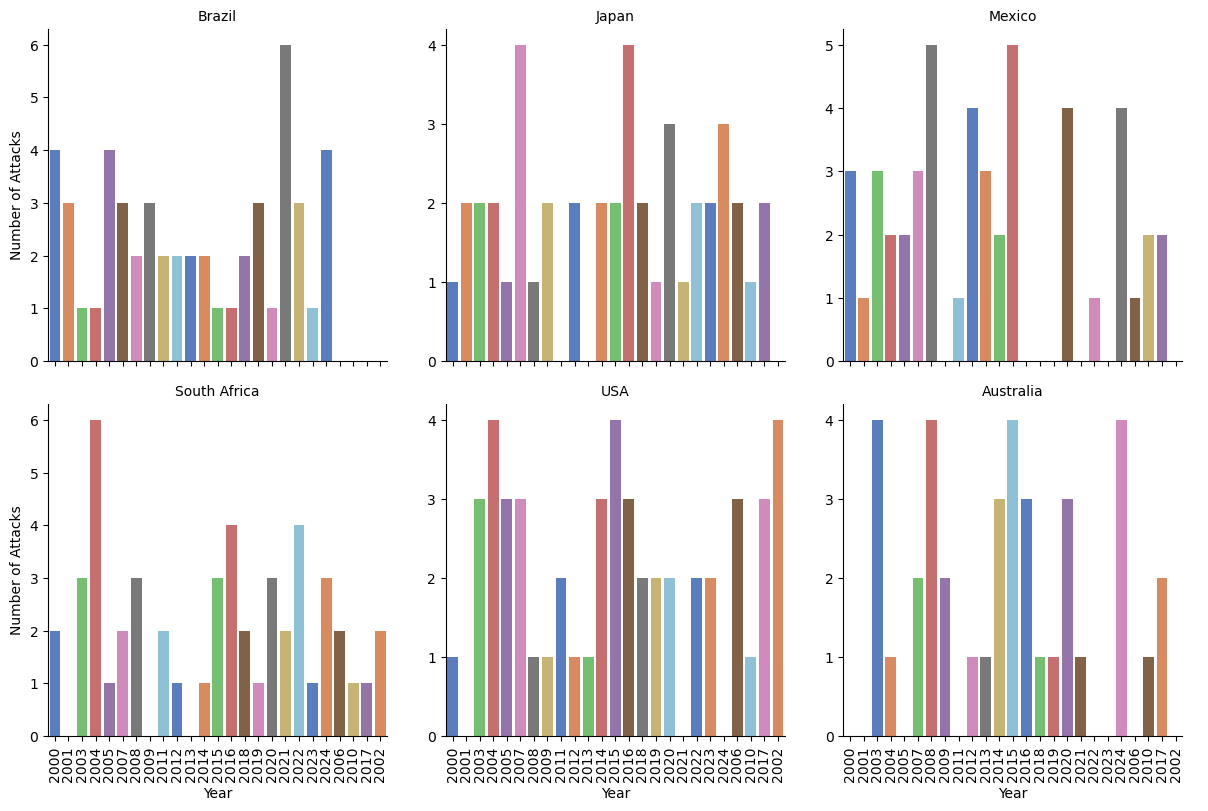

In [30]:
# Seed for reproducibility
np.random.seed(42)

# Generate sample data
years = np.arange(2000, 2025)
countries = ['USA', 'Australia', 'South Africa', 'Brazil', 'Mexico', 'Japan']
types = ['Unprovoked', 'Provoked']

# Generate a random dataset
data = {
    'case_number': [],
    'date': [],
    'year': [],
    'type': [],
    'country': []
}

for year in years:
    for _ in range(np.random.randint(5, 20)):  # Random number of cases per year
        data['case_number'].append(str(np.random.randint(10000)))
        data['date'].append(f"{year}-{np.random.randint(1, 13):02d}-{np.random.randint(1, 29):02d}")
        data['year'].append(year)
        data['type'].append(np.random.choice(types))
        data['country'].append(np.random.choice(countries))

shark_data = pd.DataFrame(data)

# Count the number of attacks per year and country
attacks_per_year_country = shark_data.groupby(['year', 'country']).size().reset_index(name='counts')

# Create a FacetGrid for more detailed analysis
g = sns.FacetGrid(attacks_per_year_country, col="country", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x='year', y='counts', palette='muted')

# Ensure y-axis shows whole numbers
for ax in g.axes.flatten():
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    for label in ax.get_xticklabels():
        label.set_rotation(90)

g.add_legend()
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Number of Attacks")
plt.show()


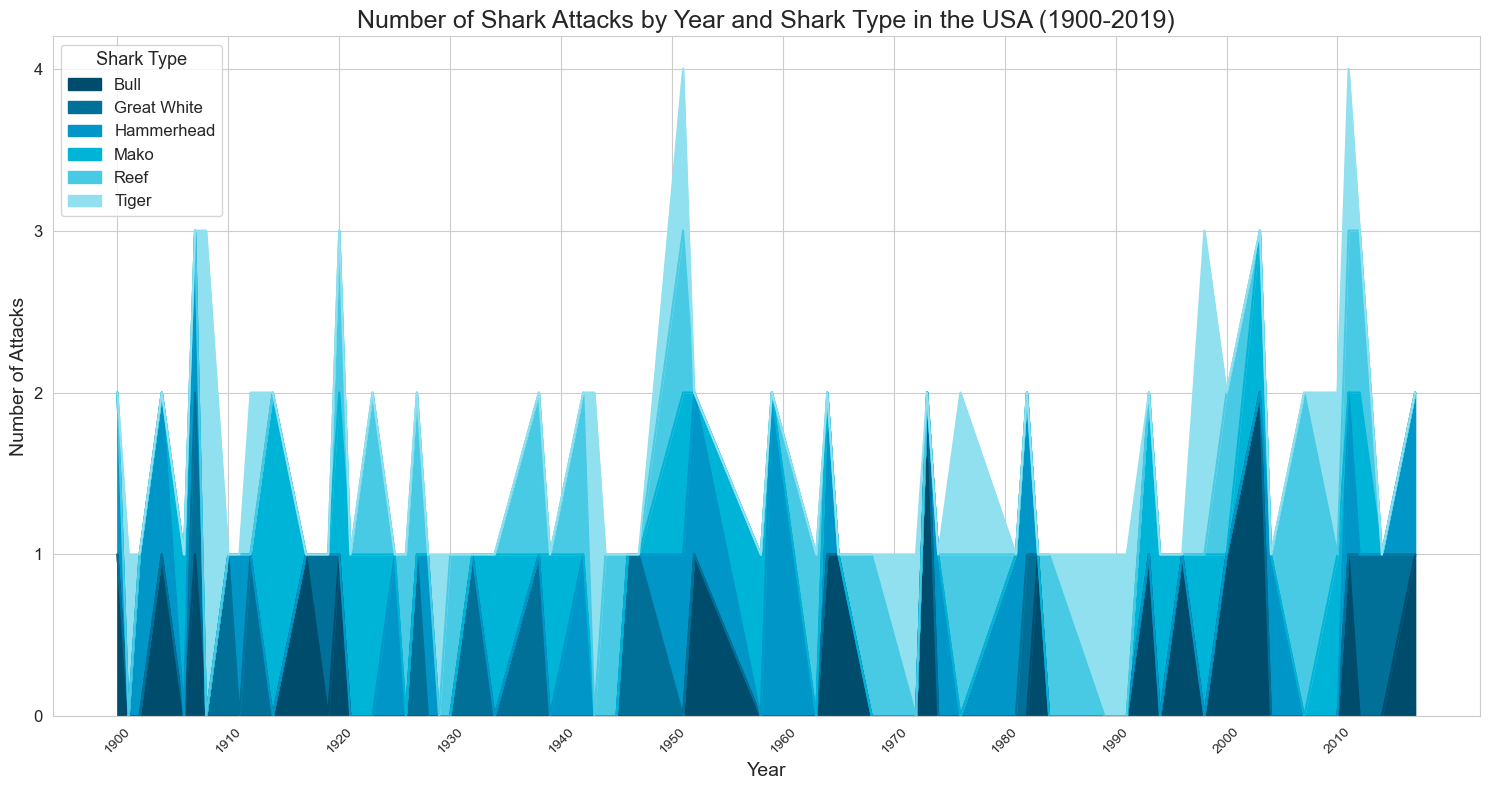

In [41]:
# Seed for reproducibility
np.random.seed(42)

# Generate sample data
years = np.arange(1900, 2020)
countries = ['USA', 'Australia', 'South Africa', 'Brazil', 'Mexico', 'Japan']
types = ['Unprovoked', 'Provoked']
shark_types = ['Great White', 'Tiger', 'Bull', 'Hammerhead', 'Reef', 'Mako']

# Generate a random dataset
data = {
    'case_number': [],
    'date': [],
    'year': [],
    'type': [],
    'country': [],
    'shark_type': []
}

for year in years:
    for _ in range(np.random.randint(1, 10)):  # Random number of cases per year
        data['case_number'].append(str(np.random.randint(10000)))
        data['date'].append(f"{year}-{np.random.randint(1, 13):02d}-{np.random.randint(1, 29):02d}")
        data['year'].append(year)
        data['type'].append(np.random.choice(types))
        data['country'].append(np.random.choice(countries))
        data['shark_type'].append(np.random.choice(shark_types))

shark_data = pd.DataFrame(data)

# Filter the dataset for USA only
shark_data_usa = shark_data[shark_data['country'] == 'USA']

# Count the number of attacks per year and shark type in the USA
attacks_per_year_shark_type_usa = shark_data_usa.groupby(['year', 'shark_type']).size().reset_index(name='counts')

# Pivot the data for the area plot
pivot_table = attacks_per_year_shark_type_usa.pivot(index='year', columns='shark_type', values='counts').fillna(0)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the stacked area plot with an ocean-themed color palette
colors = ['#004c6d', '#007098', '#0096c7', '#00b4d8', '#48cae4', '#90e0ef']
pivot_table.plot(kind='area', stacked=True, figsize=(15, 8), color=colors)

# Customize the appearance of the plot
plt.title('Number of Shark Attacks by Year and Shark Type in the USA (1900-2019)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.xticks(ticks=np.arange(1900, 2020, 10), rotation=45)
plt.yticks(fontsize=12)
plt.legend(title='Shark Type', fontsize=12, title_fontsize='13')
plt.grid(True)

# Ensure y-axis shows whole numbers
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

# Show the plot
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd
import numpy as np
import folium

# Seed for reproducibility
np.random.seed(42)

# Generate sample data
years = np.arange(1900, 2020)
countries = ['USA', 'Australia', 'South Africa', 'Brazil', 'Mexico', 'Japan']
types = ['Unprovoked', 'Provoked']
shark_types = ['Great White', 'Tiger', 'Bull', 'Hammerhead', 'Reef', 'Mako']

# Define random latitude and longitude coordinates within the USA
latitudes = np.random.uniform(low=24.396308, high=49.384358, size=1000)
longitudes = np.random.uniform(low=-125.0, high=-66.93457, size=1000)

# Generate a random dataset
data = {
    'case_number': [],
    'date': [],
    'year': [],
    'type': [],
    'country': [],
    'shark_type': [],
    'latitude': [],
    'longitude': []
}

for year in years:
    for _ in range(np.random.randint(1, 10)):  # Random number of cases per year
        data['case_number'].append(str(np.random.randint(10000)))
        data['date'].append(f"{year}-{np.random.randint(1, 13):02d}-{np.random.randint(1, 29):02d}")
        data['year'].append(year)
        data['type'].append(np.random.choice(types))
        data['country'].append(np.random.choice(countries))
        data['shark_type'].append(np.random.choice(shark_types))
        data['latitude'].append(np.random.choice(latitudes))
        data['longitude'].append(np.random.choice(longitudes))

shark_data = pd.DataFrame(data)

# Filter the dataset for USA only
shark_data_usa = shark_data[shark_data['country'] == 'USA']

# Create a base map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered on the USA

# Add markers to the map
for _, row in shark_data_usa.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Date: {row['date']}<br>Type: {row['type']}<br>Shark: {row['shark_type']}",
        tooltip=f"Case: {row['case_number']}",
        icon=folium.Icon(color='blue' if row['type'] == 'Unprovoked' else 'red')
    ).add_to(m)

# Save the map to an HTML file
m.save('shark_attacks_map.html')

# Display the map in a Jupyter Notebook (optional)
m
